In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dados/airlines.tar.gz')

In [3]:
# EDA

In [4]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [5]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [7]:
df.describe().round(2)

,Flight,Time,Length,DayOfWeek,Class
count,539382.00,539382.00,539382.00,539382.00,539382.00
mean,2427.93,802.73,132.20,3.93,0.45
std,2067.43,278.05,70.12,1.91,0.50
min,1.00,10.00,0.00,1.00,0.00
25%,712.00,565.00,81.00,2.00,0.00
50%,1809.00,795.00,115.00,4.00,0.00
75%,3745.00,1035.00,162.00,5.00,1.00
max,7814.00,1439.00,655.00,7.00,1.00


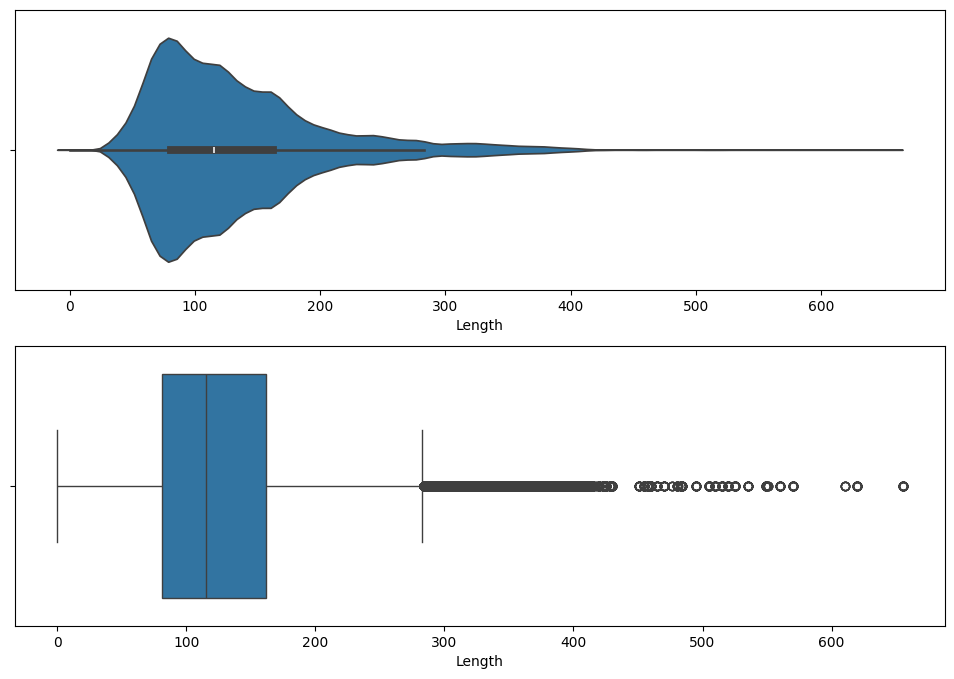

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

sns.violinplot(x='Length', data=df, ax=ax[0])
sns.boxplot(x='Length', data=df, ax=ax[1])

plt.show()

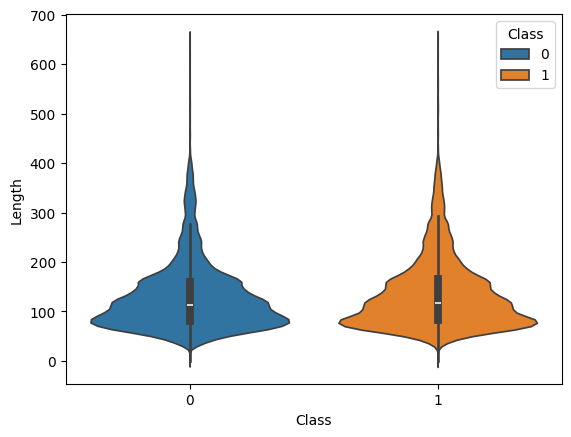

In [9]:
sns.violinplot(x='Class', y='Length', data=df, hue='Class')
plt.show()

In [10]:
df.groupby('Class').describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

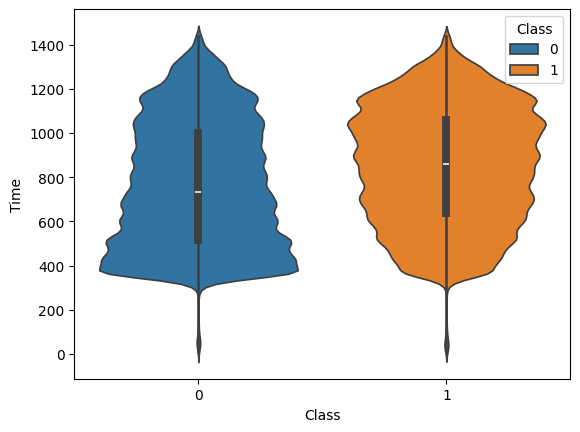

In [11]:
sns.violinplot(x='Class', y='Time', data=df, hue='Class')
plt.show()

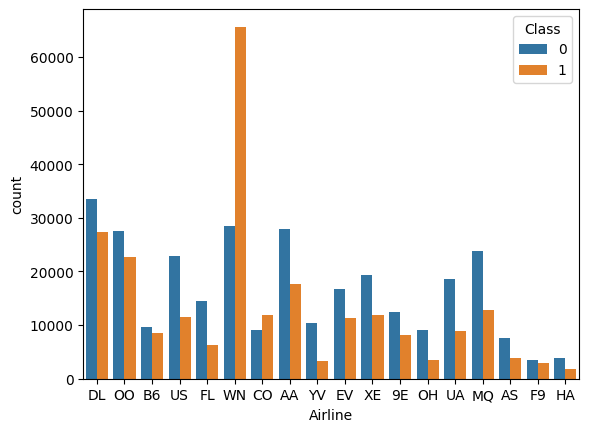

In [12]:
sns.countplot(x='Airline', hue='Class', data=df)
plt.show()

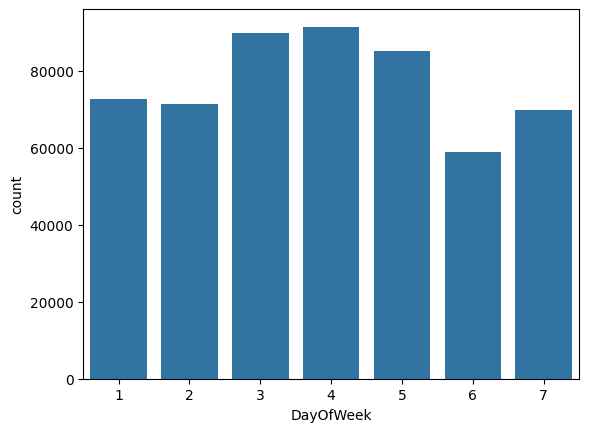

In [13]:
sns.countplot(x='DayOfWeek', data=df)
plt.show()

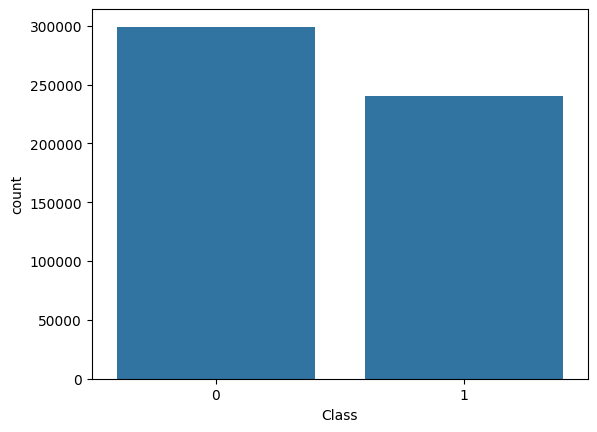

In [14]:
sns.countplot(x='Class', data=df)
plt.show()

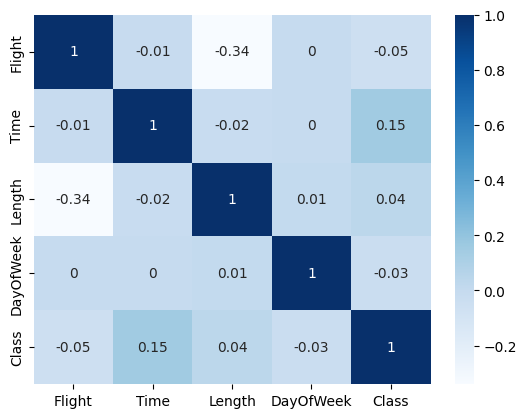

In [15]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='Blues')
plt.show()

In [16]:
# Pre Processing

In [17]:
df_model = df.copy()
df_model['AirportFrom'] = LabelEncoder().fit_transform(df_model['AirportFrom'])
df_model['AirportTo'] = LabelEncoder().fit_transform(df_model['AirportTo'])
df_model['Airline'] = LabelEncoder().fit_transform(df_model['Airline'])

In [18]:
display(df.head())
display(df_model.head())

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
3,31.0,1410.0,344.0,14,203,217,6,0
4,563.0,692.0,98.0,8,32,16,4,0
